<a href="https://colab.research.google.com/github/NatalyKu/goit-ds-hw-13/blob/main/HW13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

# Load MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
from keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras import regularizers
import datetime
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
import numpy as np

In [ ]:
def preprocess_image(image):
    image = tf.image.resize(image[..., np.newaxis], (224, 224))
    image = tf.image.grayscale_to_rgb(image)
    return image

#tf.data.Dataset for train and test data
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.map(lambda x, y: (preprocess_image(x), y))
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.map(lambda x, y: (preprocess_image(x), y))
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.map(lambda x, y: (preprocess_image(x), y))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# FEATURE EXTRACTION

In [ ]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3), classes=1000,classifier_activation="softmax", name="vgg16")
conv_base.trainable = False

model_vgg16 = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(64, activation="relu"),
   layers.Dense(10, activation="sigmoid"),
])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

model_vgg16.compile(
    loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=["acc"]
)


In [ ]:
model_vgg16.fit(train_dataset, epochs=20, validation_data=test_dataset, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 399s 205ms/step - acc: 0.7287 - loss: 0.8117 - val_acc: 0.8816 - val_loss: 0.3376 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 429s 205ms/step - acc: 0.8968 - loss: 0.2923 - val_acc: 0.8916 - val_loss: 0.3009 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 442s 205ms/step - acc: 0.9102 - loss: 0.2498 - val_acc: 0.8959 - val_loss: 0.2896 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 410s 188ms/step - acc: 0.9206 - loss: 0.2230 - val_acc: 0.8981 - val_loss: 0.2852 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 385s 206ms/step - acc: 0.9271 - loss: 0.2033 - val_acc: 0.8993 - val_loss: 0.2862 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 441s 205ms/step - acc: 0.9331 - loss: 0.1869 - val_acc: 0.8993 - val_loss: 0.2922 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 409s 188ms/step - acc: 0.9461 - loss: 0.1495 - val_acc: 0.9099 - val_l

model_vgg16.evaluate(test_dataset)

In [ ]:
model_vgg16.evaluate(test_dataset)

313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 158ms/step - acc: 0.9180 - loss: 0.2409


[0.24242769181728363, 0.9144999980926514]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


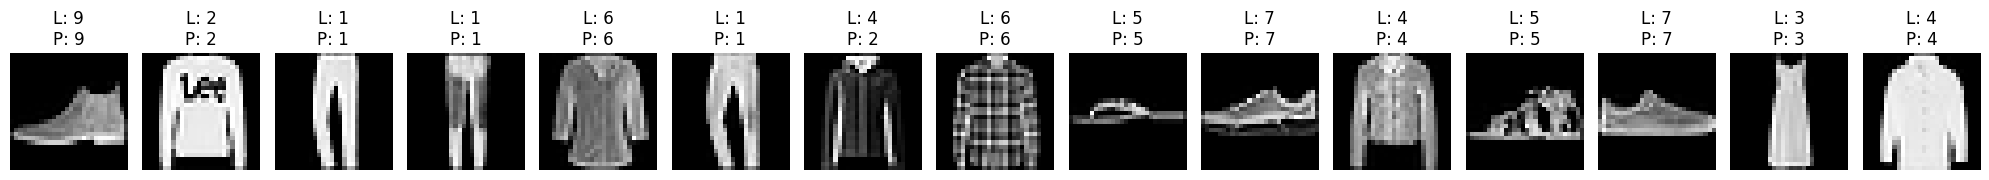

In [ ]:

num_samples = 15
plt.figure(figsize=(20, 5))

for i, (image, label) in enumerate(test_dataset.unbatch().take(num_samples)):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[i], cmap='gray')

    # Forbered input for prediksjon
    input_image = tf.expand_dims(image, axis=0)  # Legg til batch-dimensjon

    # Bruk model.predict() på input_image
    prediction = model_vgg16.predict(input_image)
    predicted_label = np.argmax(prediction)

    # Plot tittel med sanne og predikerte etiketter
    plt.title(f"L: {label.numpy()}\nP: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**FINE-TUNING**

In [ ]:

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3), classes=1000,classifier_activation="softmax", name="vgg16")
conv_base.trainable = False
num_classes = 10
inputs = tf.keras.Input(shape=(224, 224, 3))
x = conv_base(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='sigmoid')(x)
fine_tuned_model = tf.keras.Model(inputs, outputs)

fine_tuned_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=["acc"]
)


fine_tuned_model.fit(
    train_dataset,
    epochs=5,
    validation_data=val_dataset
)



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 439s 226ms/step - acc: 0.5776 - loss: 1.5287 - val_acc: 0.7613 - val_loss: 0.8021
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 429s 226ms/step - acc: 0.7721 - loss: 0.7468 - val_acc: 0.7885 - val_loss: 0.6454
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 416s 213ms/step - acc: 0.7979 - loss: 0.6220 - val_acc: 0.8053 - val_loss: 0.5794
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 468s 226ms/step - acc: 0.8120 - loss: 0.5645 - val_acc: 0.8168 - val_loss: 0.5410
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 416s 213ms/step - acc: 0.8215 - loss: 0.5298 - val_acc: 0.8227 - val_loss: 0.5151


In [ ]:
for
layer in conv_base.layers[-3:]:
    layer.trainable = True


fine_tuned_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["acc"]
)


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

fine_tuned_model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks = [early_stopping]#, reduce_lr]
)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 469s 248ms/step - acc: 0.2160 - loss: 2.4078 - val_acc: 0.2869 - val_loss: 1.5982
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 464s 247ms/step - acc: 0.3322 - loss: 1.5579 - val_acc: 0.5352 - val_loss: 1.2047
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 501s 247ms/step - acc: 0.5575 - loss: 1.1223 - val_acc: 0.6516 - val_loss: 0.7944
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 502s 247ms/step - acc: 0.6876 - loss: 0.7394 - val_acc: 0.7709 - val_loss: 0.5383
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 464s 247ms/step - acc: 0.8077 - loss: 0.4476 - val_acc: 0.8516 - val_loss: 0.2673
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 475s 233ms/step - acc: 0.8663 - loss: 0.2693 - val_acc: 0.8689 - val_loss: 0.2249
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 468s 247ms/step - acc: 0.8870 - loss: 0.2233 - val_acc: 0.8869 - val_loss: 0.2126
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 502s 247ms/step - acc: 0.9092 - loss: 0.1953 - val_acc: 0.9236 - val_loss: 0.1861
Epoch 9/